In [1]:
import os
import cv2
import random
%matplotlib inline
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, classification_report, accuracy_score

In [2]:
sns.set(rc={'figure.figsize': [30, 30]}, font_scale=1.3)
pd.set_option('mode.chained_assignment', None)

In [3]:
categories = []
data_dir = r"H:\dataset for road signs\Train"
for image_name in os.listdir(data_dir):
    categories.append(image_name)

In [4]:
print(categories)

['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '5', '6', '7', '8', '9']


In [5]:
def preprocess_images(data_dir, categories):
    preprocessed_images_lst = []
    for category in categories:  

        path = os.path.join(data_dir,category)  
        class_num = categories.index(category)  

        for img in tqdm(os.listdir(path)): 
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
                new_array = cv2.resize(img_array, (50, 50))
                preprocessed_images_lst.append([new_array, class_num])  
            except Exception as e: 
                pass
            
    return preprocessed_images_lst

In [6]:
preprocessed_images = preprocess_images(data_dir, categories)

100%|█████████████████████████████████████████████████████████████████████████████| 1470/1470 [00:04<00:00, 334.50it/s]


In [7]:
#shuffle images
random.shuffle(preprocessed_images)

In [8]:
X = []
y = []

for features,label in preprocessed_images:
    X.append(features)
    y.append(label)

In [9]:
num_classes = 43

model = Sequential()

model.add(Conv2D(16, 3, padding='valid', activation='relu',input_shape=(50,50,1))),
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(32, 3, padding='valid', activation='relu')),
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(64, 3, padding='valid', activation='relu')),
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Flatten()),
model.add(Dense(128, activation='relu')),
model.add(Dense(num_classes))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
X=np.array(X)
y=np.array(y)

In [11]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25)

In [12]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
919/919 [==============================] - 59s 60ms/step - loss: 1.0920 - accuracy: 0.6978
Epoch 2/20
919/919 [==============================] - 60s 65ms/step - loss: 0.1761 - accuracy: 0.9449
Epoch 3/20
919/919 [==============================] - 56s 61ms/step - loss: 0.1059 - accuracy: 0.9657
Epoch 4/20
919/919 [==============================] - 53s 58ms/step - loss: 0.0772 - accuracy: 0.9746
Epoch 5/20
919/919 [==============================] - 57s 62ms/step - loss: 0.0656 - accuracy: 0.9783
Epoch 6/20
919/919 [==============================] - 61s 66ms/step - loss: 0.0618 - accuracy: 0.9805
Epoch 7/20
919/919 [==============================] - 57s 62ms/step - loss: 0.0535 - accuracy: 0.9830
Epoch 8/20
919/919 [==============================] - 56s 61ms/step - loss: 0.0502 - accuracy: 0.9844
Epoch 9/20
919/919 [==============================] - 53s 57ms/step - loss: 0.0361 - accuracy: 0.9881
Epoch 10/20
919/919 [==============================] - 53s 57ms/step - loss: 0.048

In [13]:
model.evaluate(X_test,y_test)

307/307 [==============================] - 5s 16ms/step - loss: 0.0193 - accuracy: 0.9967


[0.019325517117977142, 0.996735692024231]

In [14]:
predict_prob = model.predict([X_test])

predicted_classes = np.argmax(predict_prob,axis=1)

307/307 [==============================] - 5s 17ms/step


In [15]:
print(classification_report(y_test, predicted_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      0.99      1.00       589
           2       1.00      1.00      1.00       493
           3       1.00      1.00      1.00       304
           4       1.00      1.00      1.00       548
           5       1.00      1.00      1.00       577
           6       1.00      0.99      1.00       190
           7       1.00      0.99      0.99       167
           8       1.00      1.00      1.00       110
           9       0.99      1.00      1.00       250
          10       1.00      1.00      1.00       318
          11       0.95      1.00      0.98        42
          12       1.00      0.99      1.00       553
          13       0.97      0.98      0.97        91
          14       1.00      1.00      1.00        74
          15       1.00      1.00      1.00       101
          16       1.00      0.98      0.99       131
          17       1.00    

In [17]:
# Get unique classes
unique_classes = np.unique([y_test])

In [18]:
unique_classes

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42])

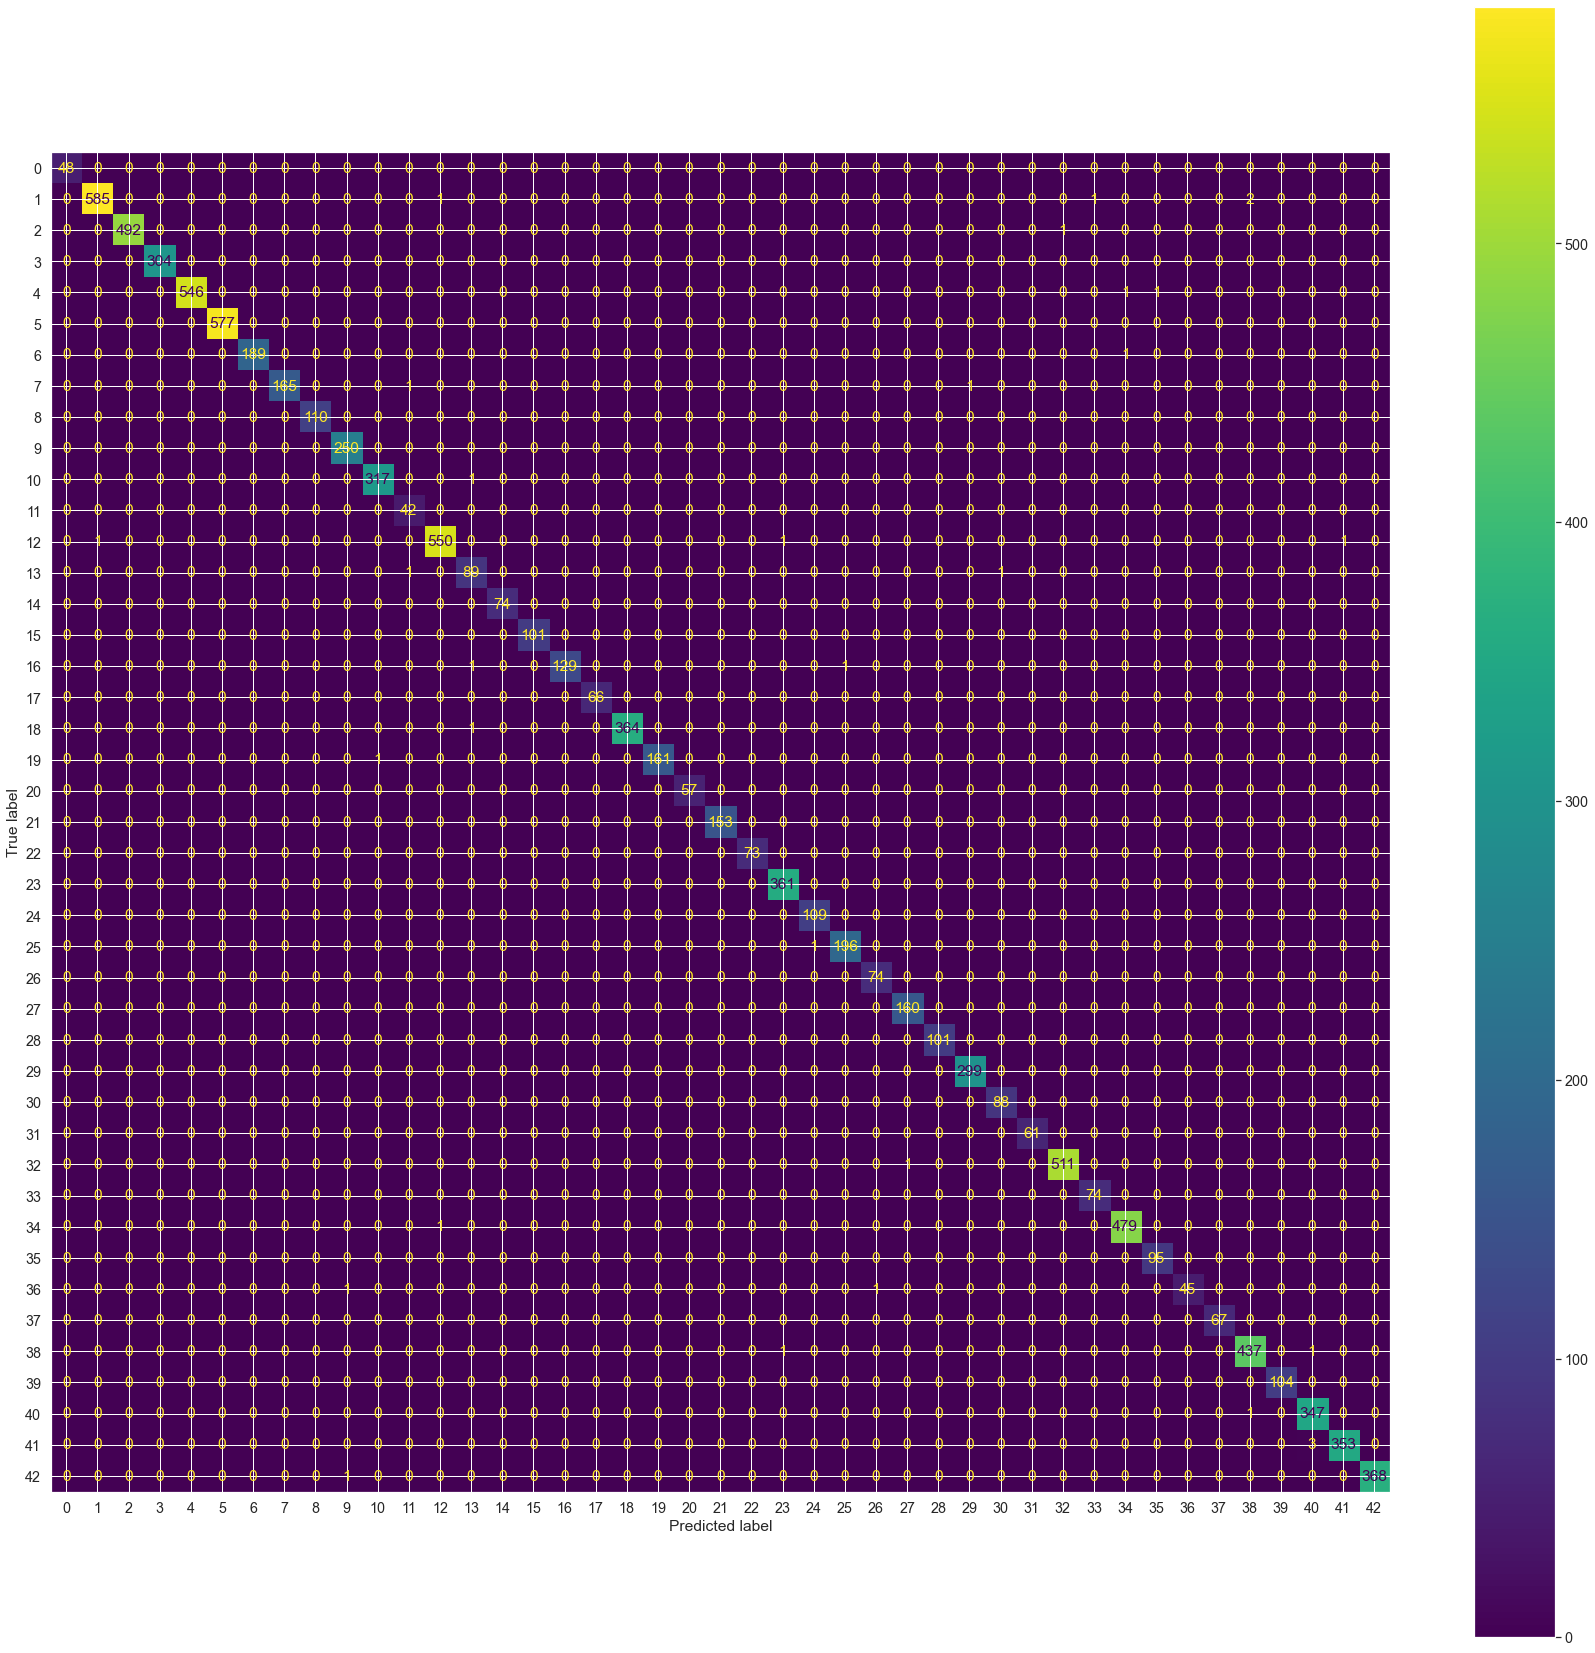

In [19]:
# Compute confusion matrix
cm = confusion_matrix(y_test, predicted_classes, labels=unique_classes)

# Display confusion matrix with increased size
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_classes)
disp.plot()

In [20]:
model.save(r'H:\dataset for road signs\road_signs_prediction.h5')